## Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Important Libraries

In [4]:
!pip install eli5
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=c3b7405742375cab1b4f7626d14eb3f21c8bb664b77f8ba8617afcfd8147fd64
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=b1205fc88703b552a94f08928bab599b28a2771270ecb941f9c145b019392d76
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built 

In [5]:
import eli5
import lime
import pandas as pd
import seaborn as sns
import lime.lime_text
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from eli5.sklearn import explain_prediction_sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC  

## Loading Data

In [6]:
# Loading Data
data = pd.read_csv('/content/drive/MyDrive/Semester-2/Advance ML/HateXplain2.csv')
data.head()

,Unnamed: 0,post_id,rationales,post_tokens,Target_cat,Label_cat,final_rationales
0,0,1179055004553900032_twitter,[],"['i', 'dont', 'think', 'im', 'getting', 'my', ...",None,normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,1179063826874032128_twitter,[],"['we', 'cannot', 'continue', 'calling', 'ourse...",None,normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,1178793830532956161_twitter,[],"['nawt', 'yall', 'niggers', 'ignoring', 'me']",African,normal,"[0, 0, 0, 0, 0]"
3,3,1179088797964763136_twitter,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['<user>', 'i', 'am', 'bit', 'confused', 'coz'...",Asian,hatespeech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,1179085312976445440_twitter,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['this', 'bitch', 'in', 'whataburger', 'eating...",Women,hatespeech,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Train Test Split

In [7]:
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

## Checking Class Imbalance

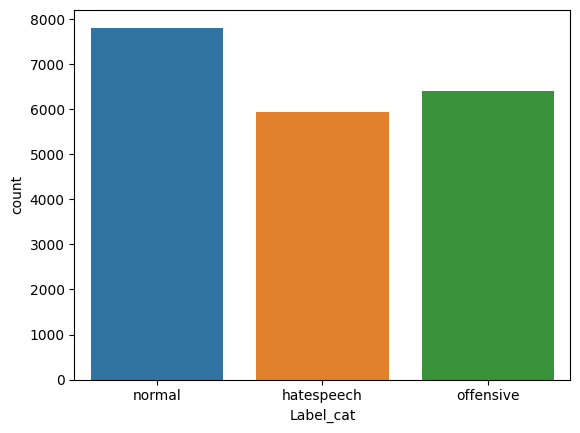

In [ ]:
# Checking Class Imbalance for whole dataset...
sns.countplot(x="Label_cat", data=data)
plt.show()

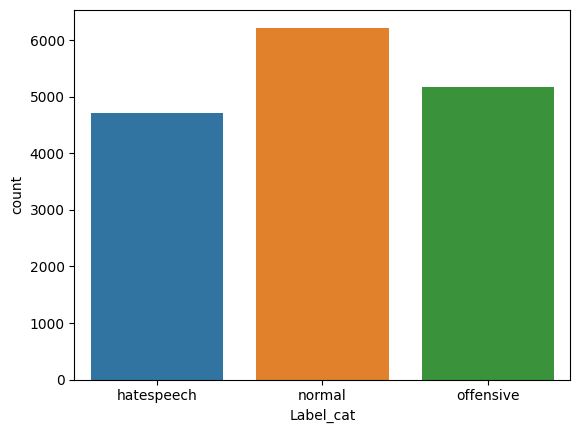

In [ ]:
# Checking class imbalance for train data...
sns.countplot(x="Label_cat", data=train_data)
plt.show()

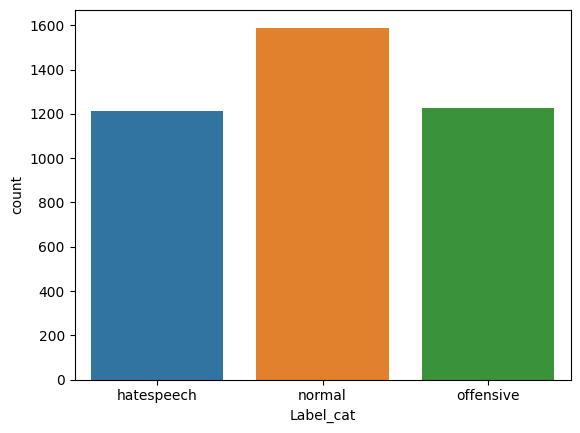

In [ ]:
# Checking class Imbalance for test data...
sns.countplot(x="Label_cat", data=test_data)
plt.show()

## Count Vectorizer

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data["post_tokens"]).toarray()
X_test = vectorizer.transform(test_data["post_tokens"]).toarray()

### Logistic Regression

In [ ]:
# create a Logistic Regression model and train it on the training data
LR = LogisticRegression()
LR.fit(X_train, train_data["Label_cat"])

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# make predictions on the testing data and calculate accuracy
y_pred_LR_test = LR.predict(X_test)
# make predictions on the training data and calculate accuracy
y_pred_LR_train = LR.predict(X_train)

# Computing Accuracy Score
accuracy_LR_train = accuracy_score(train_data["Label_cat"], y_pred_LR_train)
accuracy_LR_test = accuracy_score(test_data["Label_cat"], y_pred_LR_test)

print("Train Accuracy:", accuracy_LR_train)
print("Test Accuracy:", accuracy_LR_test)

Train Accuracy: 0.9280928154857923
Test Accuracy: 0.6272952853598015


In [ ]:
new_tweets = ["This is perfect time to learn",
              "This is normal tweet.",
              "I hate bloody pakistanis.",
              "This is the time to learn.",
              "These Americans are racist cunts",
              "Bloody Pakistani is a very wrong word.",
              "I hate bloody pakistanis."]
for tweet in new_tweets:
  new_tweet_tokens = vectorizer.transform([tweet])
  predicted_label = LR.predict(new_tweet_tokens)
  print("Predicted label:", predicted_label[0])

Predicted label: offensive
Predicted label: normal
Predicted label: normal
Predicted label: normal
Predicted label: offensive
Predicted label: normal
Predicted label: normal


In [ ]:
new_tweet = "This is perfect time to learn"
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = LR.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: offensive


In [ ]:
new_tweet = "This is normal tweet."
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = LR.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: normal


In [ ]:
new_tweet = "This is the time to learn."
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = LR.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: normal


In [ ]:
new_tweet = "I hate bloody pakistanis."
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = LR.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: normal


### SVM

In [ ]:
# Initializing object of SVC with RBF Kernel
clf = SVC(kernel='rbf')
# Training the model 
clf.fit(X_train, train_data["Label_cat"]) 

SVC()

In [ ]:
# Predicting for Test Data
y_pred_clf_test = clf.predict(X_test)
# Predicting for Train Data
y_pred_clf_train = clf.predict(X_train)

# Computing Accuracy Score
accuracy_clf_test = accuracy_score(test_data["Label_cat"], y_pred_clf_test)
accuracy_clf_train = accuracy_score(train_data["Label_cat"], y_pred_clf_train)

print("Train Accuracy:", accuracy_clf_train)
print("Test Accuracy:", accuracy_clf_test)

Train Accuracy: 0.8602804318153617
Test Accuracy: 0.6362282878411911


In [ ]:
new_tweets = ["This is perfect time to learn",
              "This is normal tweet.",
              "I hate bloody pakistanis.",
              "This is the time to learn.",
              "These Americans are racist cunts",
              "Bloody Pakistani is a very wrong word.",
              "I hate bloody pakistanis."]
for tweet in new_tweets:
  new_tweet_tokens = vectorizer.transform([tweet]).toarray()
  predicted_label = clf.predict(new_tweet_tokens)
  print("Predicted label:", predicted_label[0])

Predicted label: normal
Predicted label: normal
Predicted label: normal
Predicted label: normal
Predicted label: offensive
Predicted label: normal
Predicted label: normal


In [ ]:
new_tweet = "This is perfect time to learn"
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = clf.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: normal


In [ ]:
new_tweet = "This is normal tweet."
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = clf.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: normal


In [ ]:
new_tweet = "This is the time to learn."
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = clf.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: normal


In [ ]:
new_tweet = "I hate bloody pakistanis."
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = clf.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: normal


### RandomForest Classifier

In [ ]:
# importing random forest classifier from assemble module
RF = RandomForestClassifier()
RF.fit(X_train, train_data["Label_cat"])

RandomForestClassifier()

In [ ]:
y_pred_RF_test = RF.predict(X_test)
y_pred_RF_train = RF.predict(X_train)
accuracy_RF_test = accuracy_score(test_data["Label_cat"], y_pred_RF_test)
accuracy_RF_train = accuracy_score(train_data["Label_cat"], y_pred_RF_train)

print("Test Accuracy:", accuracy_RF_test)
print("Train Accuracy:", accuracy_RF_train)

Test Accuracy: 0.6456575682382134
Train Accuracy: 0.9989452785705423


In [ ]:
target_names = ['hatespeech','normal',"offensive"]
# inverse_transformer = TextVectorizer(vocabulary=vectorizer.vocabulary_)

new_text = "These Americans are racist cunts"
new_text_vectorized = vectorizer.transform([new_text])
predicted_class = RF.predict(new_text_vectorized)[0]

# use the inverse transform wrapper to get the text representation of the new_text_vectorized
new_text_processed = vectorizer.inverse_transform(new_text_vectorized)
# convert numpy array to string
new_text_processed_str = ' '.join(new_text_processed[0])

# use eli5 to generate an explanation for the classification decision
explanation = explain_prediction_sklearn(RF, new_text_processed_str, vec=vectorizer, target_names=target_names)

# print the predicted class and the explanation
print(f"Predicted class: {predicted_class}")
print(eli5.format_as_text(explanation))
print("Explanation:")
eli5.show_weights(explanation)

Streaming output truncated to the last 5000 lines.
      +0.000  x9221  
      +0.000  x17442 
      +0.000  x5998  
      +0.000  x1992  
      +0.000  x22048 
      +0.000  x10039 
      +0.000  x9912  
      +0.000  x9994  
      +0.000  x8903  
      +0.000  x20557 
      +0.000  x15577 
      +0.000  x19972 
      +0.000  x7524  
      +0.000  x6815  
      +0.000  x8543  
      +0.000  x569   
      +0.000  x10198 
      +0.000  x13427 
      +0.000  x14472 
      +0.000  x17777 
      +0.000  x14848 
      +0.000  x2143  
      +0.000  x22473 
      +0.000  x5559  
      +0.000  x22609 
      +0.000  x4297  
      +0.000  x10952 
      +0.000  x22718 
      +0.000  x7171  
      +0.000  x8497  
      +0.000  x18422 
      +0.000  x2617  
      +0.000  x14171 
      +0.000  x19251 
      +0.000  x23944 
      +0.000  x6300  
      +0.000  x3642  
      +0.000  x4314  
      +0.000  x23834 
      +0.000  x7824  
      +0.000  x3736  
      +0.000  x17751 
      +0.000  x16660 
   

#### Checking the Feature Importance

In [ ]:
# predict the class of a new text
new_text = "These Americans are racist cunts"
new_text_vectorized = vectorizer.transform([new_text])
predicted_class = RF.predict(new_text_vectorized)[0]

# get the feature importance values from the trained classifier
importances = RF.feature_importances_

# get the indices of the features (words) in the new text
feature_indices = new_text_vectorized.indices

# get the feature names (words) corresponding to the feature indices
feature_names = [vectorizer.get_feature_names_out()[i] for i in feature_indices]

# calculate the importance score for each feature in the new text
feature_importances = [importances[i] for i in feature_indices]

# sort the features by importance score
sorted_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# print the predicted class and the top 5 features that contributed to the prediction
print(f"Predicted class: {predicted_class}")
print("Top 5 features that contributed to the prediction:")
for feature, importance in sorted_features[:5]:
    print(f"- {feature}: {importance}")

Predicted class: offensive
Top 5 features that contributed to the prediction:
- are: 0.004226132487071178
- these: 0.0013966651696667891
- racist: 0.000705994799759295
- americans: 0.0003643183900556721
- cunts: 0.0001410492045828705


In [ ]:
new_tweets = ["This is perfect time to learn",
              "This is normal tweet.",
              "I hate bloody pakistanis.",
              "This is the time to learn.",
              "These Americans are racist cunts",
              "Bloody Pakistani is a very wrong word.",
              "I hate bloody pakistanis."]
for tweet in new_tweets:
  new_tweet_tokens = vectorizer.transform([tweet])
  predicted_label = RF.predict(new_tweet_tokens)
  print("Predicted label:", predicted_label[0])

Predicted label: normal
Predicted label: normal
Predicted label: hatespeech
Predicted label: normal
Predicted label: offensive
Predicted label: normal
Predicted label: hatespeech


In [ ]:
new_tweet = "I hate bloody pakistanis."
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = RF.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: hatespeech


In [ ]:
new_tweet = "Bloody Pakistani is a very wrong word."
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = RF.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: normal


In [ ]:
new_tweet = "Pakistanis are cunt."
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = RF.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: hatespeech


In [ ]:
new_tweet = "Twitter is full of tween dikes who think they’re superior because of “muh oppression.” News flash: No one gives a shit."
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = RF.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: offensive


In [ ]:
new_tweet = "Dad should have told the muzrat whore to fuck off, and went in anyway"
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = RF.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: hatespeech


In [ ]:
new_tweet = " A nigress too dumb to fuck has a scant chance of understanding anything beyond the size of a dick"
new_tweet_tokens = vectorizer.transform([new_tweet])
predicted_label = RF.predict(new_tweet_tokens)
print("Predicted label:", predicted_label[0])

Predicted label: hatespeech


#### Explainability Using LIME

In [ ]:
# Define the LIME explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=["Hate", "Normal", "Offensive"])

In [ ]:
# Define a function to predict the class probabilities of a sentence
def predict_proba(texts):
    vec = vectorizer.transform(texts)
    return RF.predict_proba(vec)

new_tweets = ["This is perfect time to learn",
              "This is normal tweet.",
              "I hate bloody pakistanis.",
              "This is the time to learn.",
              "These Americans are racist cunts",
              "Bloody Pakistani is a very wrong word.",
              "I hate bloody pakistanis."]

# Generate an explanation for the prediction of each sample sentence
exp = explainer.explain_instance(new_tweets[6],predict_proba)
# highlight the words according to their contribution to the predicted class
print(exp.as_list())

[('hate', -0.4482087944247314), ('pakistanis', -0.009599424301135187), ('bloody', 0.00034934590961446495), ('I', 0.00032249269157180895)]


### Gaussian Naive Bias

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,train_data['Label_cat'])

GaussianNB()

In [ ]:
y_pred_gnb_test = gnb.predict(X_test)
y_pred_gnb_train = gnb.predict(X_train)
accuracy_gnb_test = accuracy_score(test_data['Label_cat'],y_pred_gnb_test)
accuracy_gnb_train = accuracy_score(train_data['Label_cat'],y_pred_gnb_train)
print("Train Accuracy: ",accuracy_gnb_train)
print("Test Accuracy: ",accuracy_gnb_test)

Train Accuracy:  0.7705050254373992
Test Accuracy:  0.3732009925558313


In [ ]:
new_tweets = ["This is perfect time to learn",
              "This is normal tweet.",
              "I hate bloody pakistanis.",
              "This is the time to learn.",
              "These Americans are racist cunts",
              "Bloody Pakistani is a very wrong word.",
              "I hate bloody pakistanis."]
for tweet in new_tweets:
  new_tweet_tokens = vectorizer.transform([tweet]).toarray()
  predicted_label = gnb.predict(new_tweet_tokens)
  print("Predicted label:", predicted_label[0])

Predicted label: hatespeech
Predicted label: hatespeech
Predicted label: hatespeech
Predicted label: hatespeech
Predicted label: hatespeech
Predicted label: hatespeech
Predicted label: hatespeech


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, train_data['Label_cat'])

In [ ]:
y_pred_dt_test = dt_classifier.predict(X_test)
y_pred_dt_train = dt_classifier.predict(X_train)
accuracy_dt_test = accuracy_score(test_data['Label_cat'], y_pred_dt_test)
accuracy_dt_train = accuracy_score(train_data['Label_cat'], y_pred_dt_train)
print("Train Accuracy: ",accuracy_dt_train)
print("Test Accuracy: ",accuracy_dt_test)

Train Accuracy:  0.9989452785705423
Test Accuracy:  0.5803970223325062


In [ ]:
new_tweets = ["This is perfect time to learn",
              "This is normal tweet.",
              "I hate bloody pakistanis.",
              "This is the time to learn.",
              "These Americans are racist cunts",
              "Bloody Pakistani is a very wrong word.",
              "I hate bloody pakistanis."]
for tweet in new_tweets:
  new_tweet_tokens = vectorizer.transform([tweet])
  predicted_label = dt_classifier.predict(new_tweet_tokens)
  print("Predicted label:", predicted_label[0])

Predicted label: offensive
Predicted label: normal
Predicted label: normal
Predicted label: normal
Predicted label: offensive
Predicted label: normal
Predicted label: normal


## TF-IDF Vectorizer

In [15]:
# convert the tokenized text data into numerical features using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data["post_tokens"]).toarray()
X_test = tfidf_vectorizer.transform(test_data["post_tokens"]).toarray()

### Logistic Regression

In [ ]:
# create a Logistic Regression model and train it on the training data
LR_tfidf = LogisticRegression()
LR_tfidf.fit(X_train, train_data["Label_cat"])

# make predictions on the testing data and calculate accuracy
y_pred_LR_tfidf_test = LR_tfidf.predict(X_test)
# make predictions on the training data and calculate accuracy
y_pred_LR_tfidf_train = LR_tfidf.predict(X_train)

accuracy_LR_tfidf_test = accuracy_score(test_data["Label_cat"], y_pred_LR_tfidf_test)
accuracy_LR_tfidf_train = accuracy_score(train_data["Label_cat"], y_pred_LR_tfidf_train)

print("Train Accuracy:", accuracy_LR_tfidf_train)
print("Test Accuracy:", accuracy_LR_tfidf_test)

Train Accuracy: 0.8208214418662365
Test Accuracy: 0.6424317617866004


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
new_tweets = ["This is perfect time to learn",
              "This is normal tweet.",
              "I hate bloody pakistanis.",
              "This is the time to learn.",
              "Bloody Pakistani is a very wrong word.",
              "I hate bloody pakistanis."]
for tweet in new_tweets:
  new_tweet_tokens = vectorizer.transform([tweet])
  predicted_label = LR_tfidf.predict(new_tweet_tokens)
  print("Predicted label:", predicted_label[0])

Predicted label: hatespeech
Predicted label: offensive
Predicted label: normal
Predicted label: hatespeech
Predicted label: normal
Predicted label: normal


### SVM

In [ ]:
clf_tfidf = SVC(kernel='rbf')
clf_tfidf.fit(X_train, train_data["Label_cat"]) 

SVC()

In [ ]:
# make predictions on the testing data and calculate accuracy
y_pred_clf_tfidf_test = clf_tfidf.predict(X_test)
# make predictions on the training data and calculate accuracy
y_pred_clf_tfidf_train = clf_tfidf.predict(X_train)

accuracy_clf_tfidf_test = accuracy_score(test_data["Label_cat"], y_pred_clf_tfidf_test)
accuracy_clf_tfidf_train = accuracy_score(train_data["Label_cat"], y_pred_clf_tfidf_train)

print("Test Accuracy:", accuracy_clf_tfidf_test)
print("Train Accuracy:", accuracy_clf_tfidf_train)

Test Accuracy: 0.6483870967741936
Train Accuracy: 0.9535922571038591


In [ ]:
new_tweets = ["This is perfect time to learn",
              "This is normal tweet.",
              "I hate bloody pakistanis.",
              "Sucks",
              "This is the time to learn.",
              "Bloody Pakistani is a very wrong word.",
              ]
for tweet in new_tweets:
  new_tweet_tokens = vectorizer.transform([tweet])
  predicted_label = clf_tfidf.predict(new_tweet_tokens)
  print("Predicted label:", predicted_label[0])

Predicted label: offensive
Predicted label: offensive
Predicted label: normal
Predicted label: offensive
Predicted label: hatespeech
Predicted label: normal


### RandomForest Classifier

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, train_data["Label_cat"])

RandomForestClassifier()

In [ ]:
# make predictions on the testing data and calculate accuracy
y_pred_rf_test = RF.predict(X_test)
# make predictions on the training data and calculate accuracy
y_pred_rf_train = RF.predict(X_train)

accuracy_rf_test = accuracy_score(test_data["Label_cat"], y_pred_rf_test)
accuracy_rf_train = accuracy_score(train_data["Label_cat"], y_pred_rf_train)

print("Test Accuracy:", accuracy_rf_test)
print("Train Accuracy:", accuracy_rf_train)

Test Accuracy: 0.63424317617866
Train Accuracy: 0.9989452785705423


In [ ]:
new_tweets = ["This is perfect time to learn",
              "This is normal tweet.",
              "I hate bloody pakistani.",
              "This is the time to learn.",
              "Bloody Pakistani is a very wrong word.",
              "I hate Fucking."]
for tweet in new_tweets:
  new_tweet_tokens = vectorizer.transform([tweet])
  predicted_label = RF.predict(new_tweet_tokens)
  print("Predicted label:", predicted_label[0])

Predicted label: offensive
Predicted label: normal
Predicted label: normal
Predicted label: offensive
Predicted label: normal
Predicted label: hatespeech


### Decision Tree Classifier 

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, train_data['Label_cat'])

DecisionTreeClassifier()

In [11]:
y_pred_dt_tfidf_test = dt_classifier.predict(X_test)
y_pred_dt_tfidf_train = dt_classifier.predict(X_train)

accuracy_dt_tfidf_test = accuracy_score(test_data['Label_cat'], y_pred_dt_tfidf_test)
accuracy_dt_tfidf_train = accuracy_score(train_data['Label_cat'], y_pred_dt_tfidf_train)

print("Train Accuracy: ",accuracy_dt_tfidf_train)
print("Test Accuracy: ",accuracy_dt_tfidf_test)

Train Accuracy:  0.9989452785705423
Test Accuracy:  0.5617866004962779


In [13]:
new_tweets = ["This is perfect time to learn",
              "This is normal tweet.",
              "I hate bloody pakistanis.",
              "This is the time to learn.",
              "These Americans are racist cunts",
              "Bloody Pakistani is a very wrong word.",
              "I hate bloody pakistanis."]
for tweet in new_tweets:
  new_tweet_tokens = tfidf_vectorizer.transform([tweet])
  predicted_label = dt_classifier.predict(new_tweet_tokens)
  print("Predicted label:", predicted_label[0])

Predicted label: normal
Predicted label: offensive
Predicted label: normal
Predicted label: offensive
Predicted label: normal
Predicted label: normal
Predicted label: normal


### Gaussian Naive Bayes

In [16]:
gnb = GaussianNB()
gnb.fit(X_train,train_data['Label_cat'])

GaussianNB()

In [17]:
y_pred_gnb_tfidf_test = gnb.predict(X_test)
y_pred_gnb_tfidf_train = gnb.predict(X_train)
accuracy_gnb_tfidf_test = accuracy_score(test_data['Label_cat'],y_pred_gnb_tfidf_test)
accuracy_gnb_tfidf_train = accuracy_score(train_data['Label_cat'],y_pred_gnb_tfidf_train)
print("Train Accuracy: ",accuracy_gnb_tfidf_train)
print("Test Accuracy: ",accuracy_gnb_tfidf_test)

Train Accuracy:  0.7978036977292468
Test Accuracy:  0.371712158808933


In [19]:
new_tweets = ["This is perfect time to learn",
              "This is normal tweet.",
              "I hate bloody pakistanis.",
              "This is the time to learn.",
              "These Americans are racist cunts",
              "Bloody Pakistani is a very wrong word.",
              "I hate bloody pakistanis."]
for tweet in new_tweets:
  new_tweet_tokens = tfidf_vectorizer.transform([tweet]).toarray()
  predicted_label = gnb.predict(new_tweet_tokens)
  print("Predicted label:", predicted_label[0])

Predicted label: hatespeech
Predicted label: offensive
Predicted label: hatespeech
Predicted label: hatespeech
Predicted label: hatespeech
Predicted label: hatespeech
Predicted label: hatespeech


## Comparision

<html>
  <body>
      <br>
      <table>
        <th>Feature Extraction</th>
        <th>Model Name</th>
        <th>Train Accuracy</th>
        <th>Test Accuracy</th>
        <tr>
          <td>Count Vectorizer</td>
          <td>Logistic Regression</td>
          <td>92.80</td>
          <td>62.73</td>
        </tr>
        <tr>
          <td>Count Vectorizer</td>
          <td>SVM</td>
          <td>86.03</td>
          <td>63.62</td>
        </tr>
        <tr>
          <td>Count Vectorizer</td>
          <td>Random Forest Classifier</td>
          <td>99.89</td>
          <td>64.56</td>
        </tr>
        <tr>
          <td>Count Vectorizer</td>
          <td>Decision Tree Classifier</td>
          <td>99.89</td>
          <td>58.04</td>
        </tr>
        <tr>
          <td>Count Vectorizer</td>
          <td>Gaussian Naive Bayes</td>
          <td>77.05</td>
          <td>37.32</td>
        </tr>
        <tr>
          <td>TF-IDF</td>
          <td>Logistic Regression</td>
          <td>82.08</td>
          <td>64.24</td>
        </tr>
        <tr>
          <td>TF-IDF</td>
          <td>SVM</td>
          <td>95.36</td>
          <td>64.84</td>
        </tr>
        <tr>
          <td>TF-IDF</td>
          <td>Random Forest Classifier</td>
          <td>99.89</td>
          <td>63.42</td>
        </tr>
        <tr>
          <td>TF-IDF</td>
          <td>Decision Tree Classifier</td>
          <td>99.89</td>
          <td>56.18</td>
        </tr>
        <tr>
          <td>TF-IDF</td>
          <td>Gaussian Naive Bayes</td>
          <td>79.78</td>
          <td>37.17</td>
        </tr>
      </table>
      <br>
      <br>
  <body>
</html>